In [1]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

# Parameters for the FitzHugh-Nagumo model
a = 0.7
b = 2
tau = 12.5
R = 0.1
# Time span for the simulation
t_span = [0, 2500]

# Compute the nullclines
v_values = np.linspace(-2.5, 2.5, 50)
w_values = np.linspace(-0.75, 1.25, 50)

# Update the function with the parameter I_ext
def fitzhugh_nagumo(t, y, I_ext):
    v, w = y
    dvdt = v - v**3 / 3 - w + I_ext
    dwdt = (v + a - b * w) / tau
    return [dvdt, dwdt]

# Define the range of I_ext values
I_ext_values = np.linspace(-20, 20, 60)*R  # Varying I_ext from 0 to 1 in 20 steps

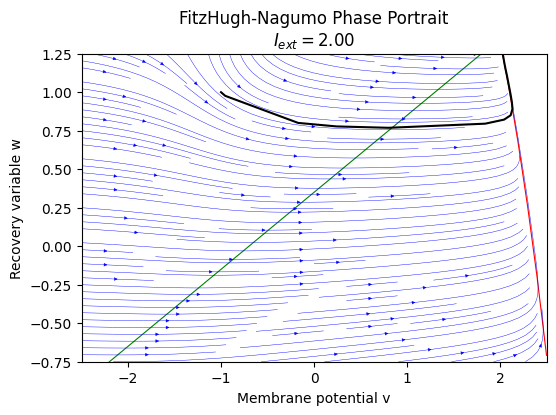

In [2]:
# We will use a simplified approach to animate the system's response to varying I_ext.
# Instead of creating a full video, we'll generate a GIF which is generally less resource-intensive.
import os
y0 = [-1.0, 1.0]  # Initial conditions for v and w
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)


# Initialize the figure and axis for the plot
# fig, ax = plt.subplots()
# Setup the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim((-2.5, 2.5))
ax.set_ylim((-0.75, 1.25))
ax.set_title('Phase portrait of the FitzHugh-Nagumo model')
ax.set_xlabel('Membrane potential v')
ax.set_ylabel('Recovery variable w')

# Loop through a range of I_ext values to create frames for the GIF

for i, I_ext in enumerate(I_ext_values):
    # Solve the differential equations with the current I_ext
    solution = solve_ivp(fitzhugh_nagumo, t_span, y0, args=(I_ext,), method='RK45', dense_output=True)

    # Clear the current axis
    ax.clear()
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-0.75, 1.25)
    
    # Generate the nullclines for the current I_ext
    v_nullcline = v_values - np.power(v_values, 3) / 3 + I_ext
    w_nullcline = (v_values + a) / b
    
    # Vector field data
    V, W = np.meshgrid(v_values, w_values)
    dV = V - np.power(V, 3) / 3 - W + I_ext
    dW = (V + a - b * W) / tau
    
    # Draw the nullclines
    ax.plot(v_values, v_nullcline, 'r', linewidth=0.8)
    ax.plot(v_values, w_nullcline, 'g', linewidth=0.8)
    
    # Draw the vector field
    ax.streamplot(V, W, dV, dW, color='blue', density=1.5, linewidth=0.3, arrowsize=0.5)
    
    # Draw the trajectory
    ax.plot(solution.y[0], solution.y[1], 'black', linewidth=1.5)
    
    # Labels and title
    ax.set_title('FitzHugh-Nagumo Phase Portrait\n$I_{{ext}} = {:.2f}$'.format(I_ext))
    ax.set_xlabel('Membrane potential v')
    ax.set_ylabel('Recovery variable w')

    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    fig.savefig(frame_path)

